In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [2]:
df=pd.read_excel('C:/Users/fshok/Documents/temp/cars.xlsx')

In [3]:
df=pd.DataFrame(df) #the dataframe should explicitely be defined

In [4]:
df

,carNames,mpg,cyl,hp
0,mazda,10.0,4,210
1,honda,9.0,4,220
2,toyota,9.2,4,225
3,porche,11.0,6,380
4,chevy,10.3,4,200


In [5]:
df.columns=['carNames1','mpg2','cyl3','hp4']

In [6]:
df

,carNames1,mpg2,cyl3,hp4
0,mazda,10.0,4,210
1,honda,9.0,4,220
2,toyota,9.2,4,225
3,porche,11.0,6,380
4,chevy,10.3,4,200


In [7]:
carsData=df.iloc[:,0]

In [8]:
df

,carNames1,mpg2,cyl3,hp4
0,mazda,10.0,4,210
1,honda,9.0,4,220
2,toyota,9.2,4,225
3,porche,11.0,6,380
4,chevy,10.3,4,200


In [9]:
carsData1=df.loc[:,['carNames1']]

In [10]:
carsData1

,carNames1
0,mazda
1,honda
2,toyota
3,porche
4,chevy


In [11]:
df.rename(columns={'carNames1':'brand'},inplace=True)

In [12]:
df

,brand,mpg2,cyl3,hp4
0,mazda,10.0,4,210
1,honda,9.0,4,220
2,toyota,9.2,4,225
3,porche,11.0,6,380
4,chevy,10.3,4,200


In [13]:
df.columns=['brand','mpg','cyl','hp']

In [14]:
df

,brand,mpg,cyl,hp
0,mazda,10.0,4,210
1,honda,9.0,4,220
2,toyota,9.2,4,225
3,porche,11.0,6,380
4,chevy,10.3,4,200


>>## <font color=magenta>operation on a column</font>
>>## <font color=magenta>operation on several columns</font>

In [15]:
df['mpg']=df['mpg']*0.95 
df['hp']=df['hp']-1

In [16]:
df['nonSense']=(df['mpg']+df['cyl'])/2.

In [17]:
df

,brand,mpg,cyl,hp,nonSense
0,mazda,9.500,4,209,6.7500
1,honda,8.550,4,219,6.2750
2,toyota,8.740,4,224,6.3700
3,porche,10.450,6,379,8.2250
4,chevy,9.785,4,199,6.8925


> ## <font color=magenta>Replacing one element of a DataFrame</font>

In [18]:
df.iloc[4,0]='GMC'  
df.iloc[4,4]=9.9999

In [19]:
df

,brand,mpg,cyl,hp,nonSense
0,mazda,9.500,4,209,6.7500
1,honda,8.550,4,219,6.2750
2,toyota,8.740,4,224,6.3700
3,porche,10.450,6,379,8.2250
4,GMC,9.785,4,199,9.9999


> ## <font color=magenta>Replacing NaN with meaidan of each column of a DataFrame<font/>

In [20]:
df.iloc[3,3]=float('NaN')

In [21]:
df

,brand,mpg,cyl,hp,nonSense
0,mazda,9.500,4,209.0,6.7500
1,honda,8.550,4,219.0,6.2750
2,toyota,8.740,4,224.0,6.3700
3,porche,10.450,6,NaN,8.2250
4,GMC,9.785,4,199.0,9.9999


In [22]:
medians=df.median()

In [23]:
df=df.fillna(medians)

In [24]:
df

,brand,mpg,cyl,hp,nonSense
0,mazda,9.500,4,209.0,6.7500
1,honda,8.550,4,219.0,6.2750
2,toyota,8.740,4,224.0,6.3700
3,porche,10.450,6,214.0,8.2250
4,GMC,9.785,4,199.0,9.9999


> ## <font color=magenta>Concatenat/Merge two DataFrame<font/>

In [25]:
price=pd.read_excel('C:/Users/fshok/Documents/temp/homePrice1.xlsx')

In [26]:
merged=pd.concat([df,price], axis='columns')

In [27]:
merged

,brand,mpg,cyl,hp,nonSense,area,bedroom,age,price
0,mazda,9.500,4.0,209.0,6.7500,2600,3.0,20,550000
1,honda,8.550,4.0,219.0,6.2750,3000,4.0,15,565000
2,toyota,8.740,4.0,224.0,6.3700,3200,NaN,18,610000
3,porche,10.450,6.0,214.0,8.2250,3600,3.0,30,595000
4,GMC,9.785,4.0,199.0,9.9999,4000,5.0,8,760000
5,NaN,NaN,NaN,NaN,NaN,2200,4.0,3,580000


In [28]:
median=merged.median()

In [29]:
merged=merged.fillna(median)

In [30]:
merged.fillna('toyota', inplace=True)

In [31]:
merged

,brand,mpg,cyl,hp,nonSense,area,bedroom,age,price
0,mazda,9.500,4.0,209.0,6.7500,2600,3.0,20,550000
1,honda,8.550,4.0,219.0,6.2750,3000,4.0,15,565000
2,toyota,8.740,4.0,224.0,6.3700,3200,4.0,18,610000
3,porche,10.450,6.0,214.0,8.2250,3600,3.0,30,595000
4,GMC,9.785,4.0,199.0,9.9999,4000,5.0,8,760000
5,toyota,9.500,4.0,214.0,6.7500,2200,4.0,3,580000


In [32]:
maxHP=merged.hp.max()

In [33]:
maxHP

224.0

>## <font color=magenta>Droppintg columns<font/>

In [34]:
final1=merged.drop(['nonSense','bedroom'],axis='columns')

In [35]:
final1

,brand,mpg,cyl,hp,area,age,price
0,mazda,9.500,4.0,209.0,2600,20,550000
1,honda,8.550,4.0,219.0,3000,15,565000
2,toyota,8.740,4.0,224.0,3200,18,610000
3,porche,10.450,6.0,214.0,3600,30,595000
4,GMC,9.785,4.0,199.0,4000,8,760000
5,toyota,9.500,4.0,214.0,2200,3,580000


>## <font color=magenta>Sorting<font/>

In [36]:
final1.sort_values('hp',ascending=False)

,brand,mpg,cyl,hp,area,age,price
2,toyota,8.740,4.0,224.0,3200,18,610000
1,honda,8.550,4.0,219.0,3000,15,565000
3,porche,10.450,6.0,214.0,3600,30,595000
5,toyota,9.500,4.0,214.0,2200,3,580000
0,mazda,9.500,4.0,209.0,2600,20,550000
4,GMC,9.785,4.0,199.0,4000,8,760000


># <font color=magenta>filtering</font>

In [37]:
mask=final1['age']>10

In [38]:
final1[mask]

,brand,mpg,cyl,hp,area,age,price
0,mazda,9.50,4.0,209.0,2600,20,550000
1,honda,8.55,4.0,219.0,3000,15,565000
2,toyota,8.74,4.0,224.0,3200,18,610000
3,porche,10.45,6.0,214.0,3600,30,595000


>## <font color=magenta>Iteration on the columns and their values. In the following example the key is column name and the value is the associated column values.<font/>

In [39]:
for key,values in final1.iteritems():  
    values=values*2
    print(key,values)

brand 0      mazdamazda
1      hondahonda
2    toyotatoyota
3    porcheporche
4          GMCGMC
5    toyotatoyota
Name: brand, dtype: object
mpg 0    19.00
1    17.10
2    17.48
3    20.90
4    19.57
5    19.00
Name: mpg, dtype: float64
cyl 0     8.0
1     8.0
2     8.0
3    12.0
4     8.0
5     8.0
Name: cyl, dtype: float64
hp 0    418.0
1    438.0
2    448.0
3    428.0
4    398.0
5    428.0
Name: hp, dtype: float64
area 0    5200
1    6000
2    6400
3    7200
4    8000
5    4400
Name: area, dtype: int64
age 0    40
1    30
2    36
3    60
4    16
5     6
Name: age, dtype: int64
price 0    1100000
1    1130000
2    1220000
3    1190000
4    1520000
5    1160000
Name: price, dtype: int64


In [40]:
for value in final1['hp']:
    print(value*1000)

209000.0
219000.0
224000.0
214000.0
199000.0
214000.0


> ## <font color='magenta'> groupby </font>

In [59]:
drinks=pd.read_csv('http://bit.ly/drinksbycountry')

In [60]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [61]:
drinks.beer_servings.mean()

106.16062176165804

In [62]:
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [63]:
mask=drinks.beer_servings>300

In [64]:
drinks1=drinks[mask]

In [66]:
drinks1.sort_values('beer_servings')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
129,Palau,306,63,23,6.9,Oceania
81,Ireland,313,118,165,11.4,Europe
188,Venezuela,333,100,3,7.7,South America
98,Lithuania,343,244,56,12.9,Europe
135,Poland,343,215,56,10.9,Europe
65,Germany,346,117,175,11.3,Europe
62,Gabon,347,98,59,8.9,Africa
45,Czech Republic,361,170,134,11.8,Europe
117,Namibia,376,3,1,6.8,Africa


In [67]:
%matplotlib inline

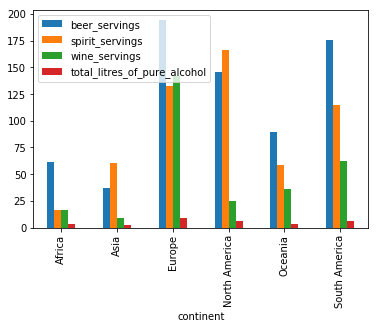

In [69]:
drinks.groupby('continent').mean().plot(kind='bar')

In [71]:
drinks.groupby('continent')

In [54]:
list(drinks.groupby('continent'))

[('Africa',
                        country  beer_servings  spirit_servings  wine_servings  \
  2                     Algeria             25                0             14   
  4                      Angola            217               57             45   
  18                      Benin             34                4             13   
  22                   Botswana            173               35             35   
  26               Burkina Faso             25                7              7   
  27                    Burundi             88                0              0   
  28              Cote d'Ivoire             37                1              7   
  29                 Cabo Verde            144               56             16   
  31                   Cameroon            147                1              4   
  33   Central African Republic             17                2              1   
  34                       Chad             15                1              1   
  38

In [58]:
dict(list(drinks.groupby('continent')))['North America']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
5,Antigua & Barbuda,102,128,45,4.9,North America
11,Bahamas,122,176,51,6.3,North America
14,Barbados,143,173,36,6.3,North America
17,Belize,263,114,8,6.8,North America
32,Canada,240,122,100,8.2,North America
41,Costa Rica,149,87,11,4.4,North America
43,Cuba,93,137,5,4.2,North America
50,Dominica,52,286,26,6.6,North America
51,Dominican Republic,193,147,9,6.2,North America
54,El Salvador,52,69,2,2.2,North America


In [141]:
price1=pd.read_excel('C:/Users/fshok/Documents/temp/homePrice1.xlsx')

In [142]:
price1

,location,area,bedroom,age,price
0,Toronto,2600,3,20,550000
1,Markham,3000,4,15,565000
2,King,3200,3,18,610000
3,Montreal,3600,3,30,595000
4,Vancouver,4000,5,8,760000
5,Ottawa,2200,4,3,580000
6,Toronto,2700,3,12,500000
7,Markham,2900,4,11,550000
8,King,5000,5,12,720000
9,Montreal,3200,3,21,480000


In [143]:
g=price1.groupby('location').max()

In [144]:
g

,area,bedroom,age,price
location,,,,
King,5000,5,18,720000
Markham,3000,4,15,565000
Montreal,3600,3,30,595000
Ottawa,2600,4,3,580000
Toronto,2700,3,20,550000
Vancouver,4000,5,8,760000


In [133]:
for Alocation, locationData in g:    #actually it shows a raw of the DataFrame
    print(aLocation)
    print(locationData)

King
  location  area  bedroom  age   price
2     King  3200        3   18  610000
8     King  5000        5   12  720000
King
  location  area  bedroom  age   price
1  Markham  3000        4   15  565000
7  Markham  2900        4   11  550000
King
   location  area  bedroom  age   price
3  Montreal  3600        3   30  595000
9  Montreal  3200        3   21  480000
King
   location  area  bedroom  age   price
5    Ottawa  2200        4    3  580000
11   Ottawa  2600        4    1  510000
King
  location  area  bedroom  age   price
0  Toronto  2600        3   20  550000
6  Toronto  2700        3   12  500000
King
     location  area  bedroom  age   price
4   Vancouver  4000        5    8  760000
10  Vancouver  3300        2    7  680000


In [134]:
dict(list(g))

{'King':   location  area  bedroom  age   price
 2     King  3200        3   18  610000
 8     King  5000        5   12  720000,
 'Markham':   location  area  bedroom  age   price
 1  Markham  3000        4   15  565000
 7  Markham  2900        4   11  550000,
 'Montreal':    location  area  bedroom  age   price
 3  Montreal  3600        3   30  595000
 9  Montreal  3200        3   21  480000,
 'Ottawa':    location  area  bedroom  age   price
 5    Ottawa  2200        4    3  580000
 11   Ottawa  2600        4    1  510000,
 'Toronto':   location  area  bedroom  age   price
 0  Toronto  2600        3   20  550000
 6  Toronto  2700        3   12  500000,
 'Vancouver':      location  area  bedroom  age   price
 4   Vancouver  4000        5    8  760000
 10  Vancouver  3300        2    7  680000}

In [135]:
g.get_group('Montreal')

,location,area,bedroom,age,price
3,Montreal,3600,3,30,595000
9,Montreal,3200,3,21,480000


In [136]:
price1

,location,area,bedroom,age,price
0,Toronto,2600,3,20,550000
1,Markham,3000,4,15,565000
2,King,3200,3,18,610000
3,Montreal,3600,3,30,595000
4,Vancouver,4000,5,8,760000
5,Ottawa,2200,4,3,580000
6,Toronto,2700,3,12,500000
7,Markham,2900,4,11,550000
8,King,5000,5,12,720000
9,Montreal,3200,3,21,480000


In [148]:
price1.mean()

area         3191.666667
bedroom         3.583333
age            13.166667
price      591666.666667
dtype: float64

In [139]:
g1=price1.groupby('price').max()

In [145]:
g1.mean()

area       3245.454545
bedroom       3.636364
age          13.363636
dtype: float64

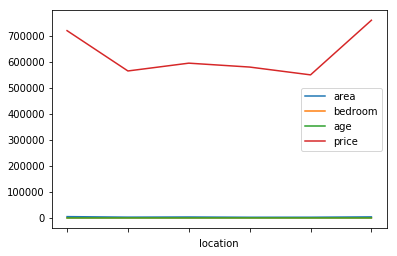

In [150]:
g.plot()